In [2]:
import matplotlib.pyplot as plt
import numpy
from sklearn import datasets
import os
import pandas as pd
import torch

In [3]:
def linear_model(x, w, b):
  return x * w + b

def mse_loss(h, y):
  return torch.mean((h - y) ** 2)

In [4]:
x = torch.tensor([50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0, 120.0])
y = torch.tensor([280.0, 305.0, 350.0, 425.0, 480.0, 500.0, 560.0, 630.0])
alpha = 0.0001
n = 10000

w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

for i in range(n):
  h = linear_model(x, w, b)  # 计算预测值
  loss = mse_loss(h, y)  # 计算损失函数的值
  loss.backward()  # 计算 loss 关于 w、b 的偏导数
  # w.data.subtract_(alpha * w.grad.data)
  # b.data.subtract_(alpha * b.grad.data)
  w.data -= alpha * w.grad.data
  b.data -= alpha * b.grad.data
  w.grad.zero_()
  b.grad.zero_()
  # if i % 100 == 0:
  print(f'Epoch {i}, Loss: {loss.item()}')

Epoch 0, Loss: 212581.125
Epoch 1, Loss: 64473.734375
Epoch 2, Loss: 19640.8359375
Epoch 3, Loss: 6069.70458984375
Epoch 4, Loss: 1961.6533203125
Epoch 5, Loss: 718.1260986328125
Epoch 6, Loss: 341.70294189453125
Epoch 7, Loss: 227.7579803466797
Epoch 8, Loss: 193.26580810546875
Epoch 9, Loss: 182.82496643066406
Epoch 10, Loss: 179.66429138183594
Epoch 11, Loss: 178.70684814453125
Epoch 12, Loss: 178.41688537597656
Epoch 13, Loss: 178.32894897460938
Epoch 14, Loss: 178.30247497558594
Epoch 15, Loss: 178.2938690185547
Epoch 16, Loss: 178.2913818359375
Epoch 17, Loss: 178.29026794433594
Epoch 18, Loss: 178.28985595703125
Epoch 19, Loss: 178.2890167236328
Epoch 20, Loss: 178.28871154785156
Epoch 21, Loss: 178.28829956054688
Epoch 22, Loss: 178.2882843017578
Epoch 23, Loss: 178.28793334960938
Epoch 24, Loss: 178.28762817382812
Epoch 25, Loss: 178.28732299804688
Epoch 26, Loss: 178.28697204589844
Epoch 27, Loss: 178.28663635253906
Epoch 28, Loss: 178.286376953125
Epoch 29, Loss: 178.2861022

In [5]:
print(f'w: {w.item():.3f}, b: {b.item():.3f}')

w: 5.162, b: 1.699


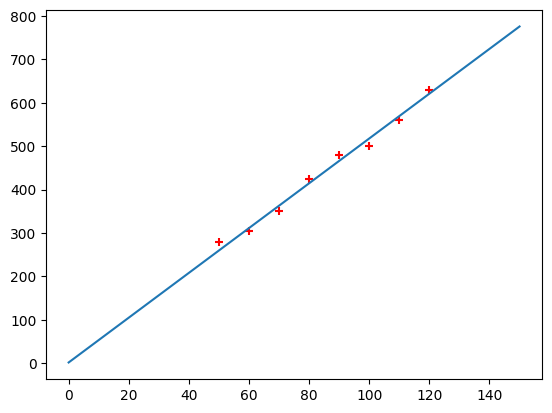

In [15]:
import numpy as np

plt.scatter(x.tolist(), y.tolist(), color="red", marker="+")

new_x = np.linspace(0, 150, 500)
new_y = linear_model(new_x, w.item(), b.item())
plt.plot(new_x, new_y)